Competition : Kannada MNIST---MNIST like datatset for Kannada handwritten digits https://kaggle.com/competitions/Kannada-MNIST

介紹 : 
這個比賽是改編自經典的MNIST比賽，原本是要使用演算法辨識手寫阿拉伯數字，在這裡變成要辨識康納達語(Kannada)中的數字，這是在印度境內通行的其中一種語言。

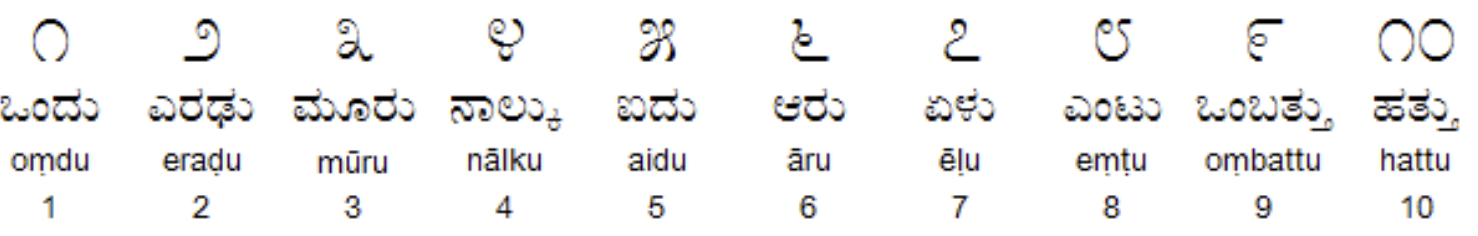

動機 : 我會選擇這個比賽是因為它已經預先把原始圖片轉換成像素值的陣列，因此只需要將一張圖片的數值分類到其最有可能對應到的數字，以我剛接觸Kaggle競賽來說是相對容易的題目，而且使用第一次見到的印度語言也比原本的阿拉伯數字有趣。

資料集 : 這個比賽使用的是Kannada-MNIST資料集，即是康納達語中手寫數字的影像資料集，包含了28x28像素的灰階影像，以及其對應的數字標籤。

目標:對手寫康納達語文字的圖像進行分類，將它們分為0-9的10個不同數字類別。最終目標是達到在測試集上的高準確率，也就是盡可能準確地預測未知圖像的類別。此競賽的評估標準是分類準確度，即正確分類測試圖像的比例。

程式碼:

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Importing dataset
train_df = pd.read_csv('/kaggle/input/Kannada-MNIST/train.csv')
test_df = pd.read_csv('/kaggle/input/Kannada-MNIST/test.csv')

In [ ]:
# Separate the input features (pixels) and the target label (digit) for the training data
X_train = train_df.iloc[:, 1:].values.astype(np.float32)
y_train = train_df.iloc[:, 0].values.astype(np.int32)

In [ ]:
# Normalize the pixel values to be between 0 and 1
X_train /= 255.0

In [ ]:
# Create and fit the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

In [ ]:
# Predict the labels for the test data
X_test = test_df.iloc[:, 1:].values.astype(np.float32)
X_test /= 255.0
y_test_pred = rf.predict(X_test)

In [ ]:
# Create a submission file
submission_df = pd.DataFrame({'id': test_df.index.values, 'label': y_test_pred})
submission_df.to_csv('submission.csv', index=False)

結果:在本地端測試的結果見附檔中的'submission.csv'，上傳至Kaggle網站的結果如圖。

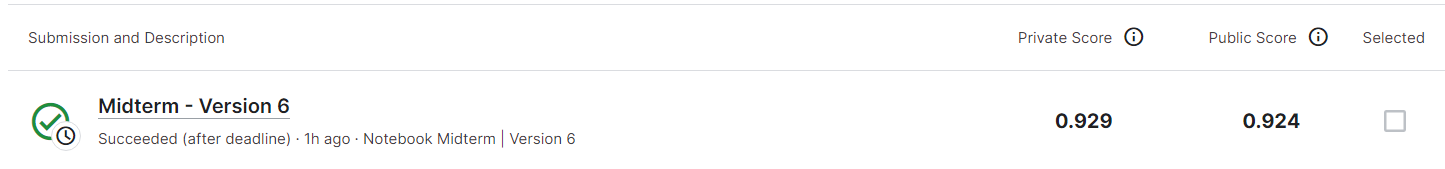

關聯性:
這個比賽與上課中實作的鐵達尼號還有房價預測都是在將資料進行分類以預測結果，主要差異在於預處理的方式和使用的演算法。例如在鐵達尼號中使用中位數來填補缺失的資料，而在Kannada MNIST中則是將資料數據標準化。

延伸學習:在Kannada MNIST中我使用了隨機森林演算法，其原理是利用訓練集的資料隨機生成多棵決策樹來取得不同的預測結果，以此統合出所有結果中的最佳解。因為我對機器學習還沒有深入的了解，在這個比賽中使用隨機森林演算法其實是出自於ChatGPT給我的建議，而我藉由以下的網路文章來了解其原理。

https://medium.com/chung-yi/ml%E5%85%A5%E9%96%80-%E5%8D%81%E4%B8%83-%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-6afc24871857

結果分析:我這次比賽結果的公開分數為0.924，相較於排行榜上動輒0.99以上的分數遜色不少，代表我的程式碼在辨識數字的準確率仍有不小的瑕疵。我認為可能的原因是大部分人在這個比賽是採用CNNs卷積神經網路來進行實作，這顯然也是較為適合的解法，但因為我在Kaggle還是新手的階段所以沒有採用這種作法，而是參照上課內容將資料集預處理後另外使用隨機森林演算法來將手寫圖像分類為所預測的數字。若我再來有機會繼續學習機器學習的應用，想必會重新用CNNs再實作一次這個比賽來打破我這次的紀錄。